In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Data files
bb_path = "data/billboardHot100_1999-2019.csv"
songAtt_path = "data/songAttributes_1999-2019.csv"
gramAlb_path = "data/grammyAlbums_199-2019.csv"
roty_path = "data/ROTYdata (Edited) (1).csv"
aoty_path = "data/AOTYdata(Edited) (1).csv"


# Read the data
bb_data = pd.read_csv(bb_path)
songAtt_data = pd.read_csv(songAtt_path)
gramAlb_data = pd.read_csv(gramAlb_path)
roty_data = pd.read_csv(roty_path)
aoty_data = pd.read_csv(aoty_path)

# Combine the data into a single DataFrame
# results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# bb_data.head()
# songAtt_data.head()
# gramAlb_data.head()
# Display the data table for preview

In [2]:
# rename merge column
bb_data = bb_data.rename(columns={'Artists': 'Artist'})
bb_data.head()

,Unnamed: 0,Artist,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
0,1,"Lil Nas,",Old Town Road,1,1.0,7.0,2019-07-06,"April 5, 2019","Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,"June 21, 2019",Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,"March 29, 2019","Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,"February 7, 2019","Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,"May 10, 2019","Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN


In [24]:
# take out unneccesary years
gramAlb_new = gramAlb_data[~gramAlb_data.GrammyYear.between(1999, 2009)]
gramAlb_new.columns = gramAlb_new.columns.str.strip()
gramAlb_new.head()

,Unnamed: 0,Award,GrammyYear,Genre,Album,Artist
0,0,Album Of The Year,2018,General,Golden Hour,Kacey Musgraves
1,1,Best Traditional Pop Vocal Album,2018,Traditional Pop,My Way,Willie Nelson
2,2,Best Pop Vocal Album,2018,Pop,Sweetener,Ariana Grande
3,3,Best Dance/Electronic Album,2018,Dance/Electronic Music,Woman Worldwide,Justice
4,4,Best Contemporary Instrumental Album,2018,Contemporary Instrumental Music,Steve Gadd Band,Steve Gadd Band


In [4]:
# overallgenre

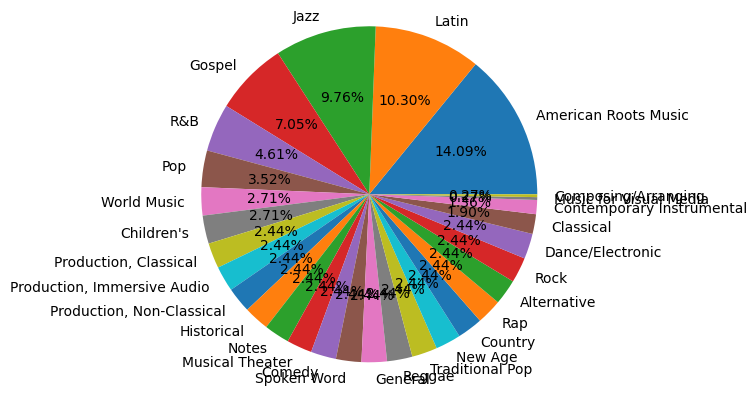

In [5]:
overallgenre = [52,38,36,26,17,13,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,7,5,1,1]
genres = ["American Roots Music ", "Latin", "Jazz", "Gospel", "R&B", "Pop", "World Music", "Children's", "Production, Classical", "Production, Immersive Audio", "Production, Non-Classical", "Historical", "Notes", "Musical Theater", "Comedy", "Spoken Word", "General", "Reggae", "Traditional Pop", "New Age", "Country", "Rap", "Alternative", "Rock", "Dance/Electronic", "Classical", "Contemporary Instrumental", "Music for Visual Media", "Composing/Arranging"]
plt.pie(overallgenre, labels = genres, autopct = "%1.2f%%")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("overallgenre.png")
plt.show()

In [6]:
# Due to overlap with multiple Award categories "American Roots Music" is the highest nominated genre, next to Latin and Jazz.

In [7]:
# filter
gramAlb_new2 = gramAlb_new.set_index("Award")
# gramAlb_new2.loc["Album Of The Year"]

In [8]:
# grammy 
gramAlb_new3 = gramAlb_new2.loc["Album Of The Year"].drop(columns = ["Unnamed: 0"])
gramAlb_new3.head(10)

,GrammyYear,Genre,Album,Artist
Award,,,,
Album Of The Year,2018,General,Golden Hour,Kacey Musgraves
Album Of The Year,2017,General,24K Magic,Bruno Mars
Album Of The Year,2016,General,25,Adele
Album Of The Year,2015,General,1989,"ack Antonoff, Nathan Chapman, Imogen Heap, Max..."
Album Of The Year,2014,General,Morning Phase,Beck
Album Of The Year,2013,General,Random Access Memories,Daft Punk
Album Of The Year,2012,General,Babel,Mumford & Sons
Album Of The Year,2011,General,21,Adele
Album Of The Year,2010,General,The Suburbs,Arcade Fire


In [9]:
# roty_genre

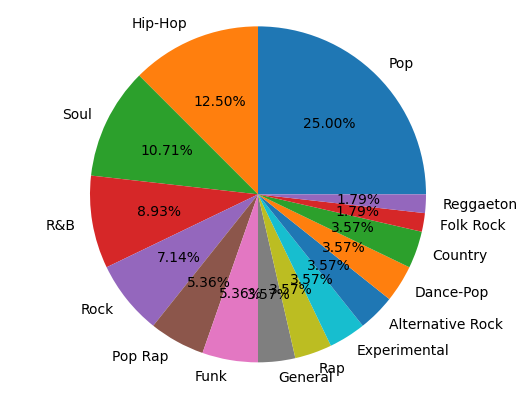

In [10]:
roty_genre = [14,7,6,5,4,3,3,2,2,2,2,2,2,1,1]
genres = ["Pop", "Hip-Hop", "Soul", "R&B", "Rock", "Pop Rap", "Funk", "General", "Rap", "Experimental", "Alternative Rock", "Dance-Pop", "Country", "Folk Rock", "Reggaeton"]
plt.pie(roty_genre, labels = genres, autopct = "%1.2f%%")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("roty_genre.png")
plt.show()

In [11]:
# The 25% of the Record of the Year Nominees and Winners from 2010-2019 are Pop records, with Hip-Hop, Soul , and R&B following while the other <50% consist of the other genres.

In [12]:
#roty_data.head()
roty_winner = roty_data.set_index("status")
# roty_winner = roty_data.loc["Winner"]
roty_winner2 = roty_winner.loc["Winner"]
roty_winner2.head(25)

,year,record,artist,Record Label,Did Perform at Grammys,Genre
status,,,,,,
Winner,2010,Need You Now,Lady Antebellum,Capital Nashville,True,General
Winner,2011,Rolling in the Deep,Adele,Columbia Records,True,Pop
Winner,2012,Somebody That I Used to Know,Gotye,Eleven: A Music Company,False,Alternative Rock
Winner,2013,Get Lucky,Daft Punk,Columbia Records,True,General
Winner,2014,Stay with Me (Darkchild Version),Sam Smith,Capital Records,True,Soul
Winner,2015,Uptown Funk,Mark Ronson,RCA Records,False,Funk
Winner,2016,Hello,Adele,Columbia Records,True,Soul
Winner,2017,24K Magic,Bruno Mars,Atlantic Records,True,Funk
Winner,2018,This Is America,Childish Gambino,RCA Records,False,Hip-Hop


In [13]:
# aoty_genre

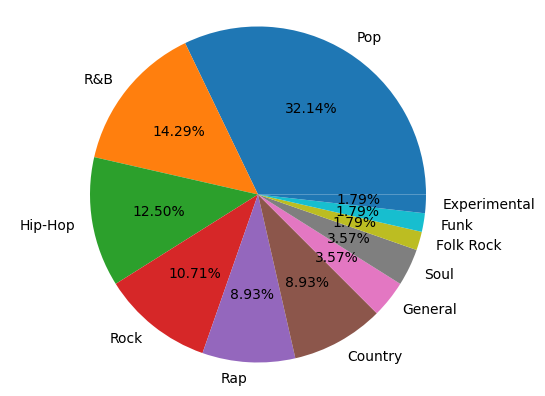

In [14]:
aoty_genre = [18,8,7,6,5,5,2,2,1,1,1]
genres = ['Pop', 'R&B', 'Hip-Hop', 'Rock', 'Rap', 'Country', 'General',
       'Soul', 'Folk Rock', 'Funk', 'Experimental', ]
plt.pie(aoty_genre, labels = genres, autopct = "%1.2f%%")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("aoty_genre.png")
plt.show()

In [15]:
# Album of the Year Winners and Nominees consist largely almost one third of Pop Albums, collectively R&B, Hip-Hop, and Rock take another third of 

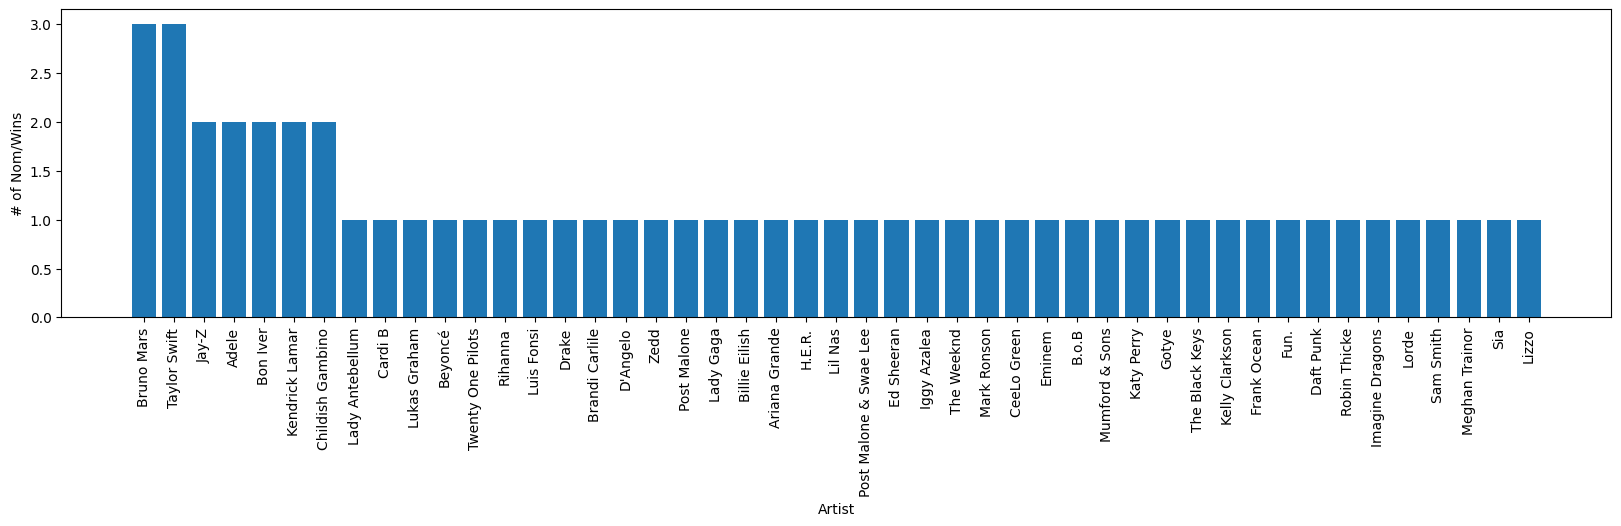

In [16]:
plt.figure(figsize=(20,4))
xAxis = roty_data["artist"].value_counts().index.values
yAxis = roty_data["artist"].value_counts().values
plt.bar(xAxis, yAxis, align = 'center')
plt.xlabel("Artist")
plt.ylabel("# of Nom/Wins")
plt.xticks(rotation = "vertical")
plt.savefig("nomwinbarchart.png")
plt.show()

In [17]:
# In ten years Bruno Mars and Taylor Swift each were nominated for or won 3 Awards. 

In [18]:
roty_data['Did Perform at Grammys'] = roty_data['Did Perform at Grammys'].astype("string")
roty_data.loc[(roty_data['status'] == 'Winner') & (roty_data['Did Perform at Grammys'] == 'True')]

,year,record,artist,status,Record Label,Did Perform at Grammys,Genre
0,2010,Need You Now,Lady Antebellum,Winner,Capital Nashville,True,General
5,2011,Rolling in the Deep,Adele,Winner,Columbia Records,True,Pop
16,2013,Get Lucky,Daft Punk,Winner,Columbia Records,True,General
21,2014,Stay with Me (Darkchild Version),Sam Smith,Winner,Capital Records,True,Soul
31,2016,Hello,Adele,Winner,Columbia Records,True,Soul
36,2017,24K Magic,Bruno Mars,Winner,Atlantic Records,True,Funk
49,2019,Bad Guy,Billie Eilish,Winner,Interscope Records,True,Pop


In [19]:
# 70% of Record of the Year winners in the last ten years performed at the Grammy's.

In [20]:
aoty_data['Did Perform at Grammys'] = aoty_data['Did Perform at Grammys'].astype("string")
aoty_data.loc[(aoty_data['status'] == 'Winner')]

,year,album name,artist,status,Record Label,Did Perform at Grammys,Genre
0,2010,The Suburbs,Arcade Fire,Winner,Merge Records,TRUE,Rock
5,2011,21,Adele,Winner,Columbia Records,TRUE,Pop
10,2012,Babel,Mumford & Sons,Winner,Island Records,TRUE,Folk Rock
15,2013,Random Access Memories,Daft Punk,Winner,Columbia Records,TRUE,General
20,2014,Morning Phase,Beck,Winner,Capital Records,TRUE,Rock
25,2015,1989,Taylor Swift,Winner,Big Machine Records,TRUE,Country
30,2016,25,Adele,Winner,Columbia Records,TRUE,Pop
35,2017,24K Magic,Bruno Mars,Winner,Atlantic Records,TRUE,Funk
40,2018,Golden Hour,Kacey Musgraves,Winner,MCA Nashville,TRUE,Country
48,2019,"When We All Fall Asleep, Where Do We Go?",Billie Eilish,Winner,Interscope Records,TRUE,Pop


In [21]:
# 100% of Album of the Year winners from 2010-2019 performed at the Grammy's. 
# In 2011, 2013, 2016, 2017, and 2019 one artist won both awards (50%).
# Coulmbia Records produced the most winning Albums of the Year and Records of the Year.